In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# read in csv as dataframe
county_df = pd.read_csv('https://mydataclassdb-bucket.s3.amazonaws.com/covid_and_politics_db.csv')
county_df.head()

,county,state,county_state,lat,long,totalpop,total_votes20,votes20_donald_trump,votes20_joe_biden,percentage20_donald_trump,...,age_55to64,age_65to74,age_75to84,age_84plus,evangelicals,protestant,catholic,orthodox,muslim,other
0,Kay,OK,"Kay, OK",36.817997,-97.144214,45173,17249,12834,4040,0.744,...,5694,4632,2724,1183,0,0,0,0,0,0
1,Abbeville,SC,"Abbeville, SC",34.223334,-82.461707,24788,12433,8215,4101,0.661,...,3584,3150,1602,591,0,0,0,0,0,0
2,Acadia,LA,"Acadia, LA",30.295065,-92.414197,62607,28425,22596,5443,0.795,...,0,0,0,0,0,0,0,0,0,0
3,Accomack,VA,"Accomack, VA",37.767072,-75.632346,32840,16938,9172,7578,0.542,...,5270,4451,2301,886,0,0,0,0,0,0
4,Ada,ID,"Ada, ID",43.452658,-116.241552,435117,259389,130699,120539,0.504,...,56615,42027,18576,7189,0,0,0,0,0,0


In [4]:
# normalize cases by dividing into each counties total population
county_df['normalized_cases'] = county_df['cases']/county_df['totalpop']
county_df['normalized_cases'].head()

0    0.020366
1    0.032475
2    0.050825
3    0.037363
4    0.040106
Name: normalized_cases, dtype: float64

In [5]:
# check columns
col = ['totalpop', 'total_votes20', 'votes20_donald_trump', 'votes20_joe_biden',
       'percentage20_donald_trump', 'percentage20_joe_biden', 'cases',
       'deaths', 'men', 'women', 'hispanic', 'white', 'black', 'native',
       'asian', 'pacific', 'income', 'incomepercap', 'poverty', 'professional',
       'service', 'office', 'construction', 'production', 'drive', 'carpool',
       'transit', 'walk', 'othertransp', 'workathome', 'meancommute',
       'employed', 'privatework', 'publicwork', 'selfemployed', 'familywork',
       'unemployment', 'cases_per_capita_100k', 'deaths_per_capita_100k',
       'pop_per_sq_mile_2010', 'age_oto4', 'age_5to14', 'age_15to24',
       'age_25to34', 'age_35to44', 'age_45to54', 'age_55to64', 'age_65to74',
       'age_75to84', 'age_84plus', 'evangelicals', 'protestant', 'catholic',
       'orthodox', 'muslim', 'other', 'normalized_cases']
col[:5]

['totalpop',
 'total_votes20',
 'votes20_donald_trump',
 'votes20_joe_biden',
 'percentage20_donald_trump']

total_votes20


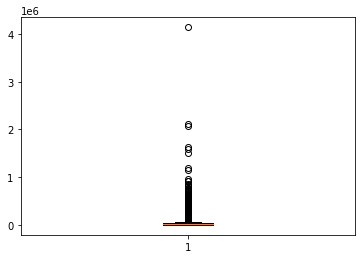

votes20_donald_trump


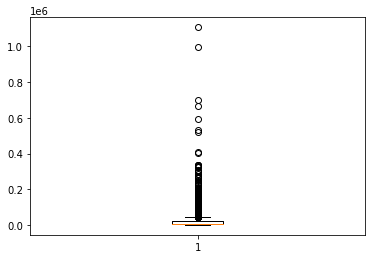

votes20_joe_biden


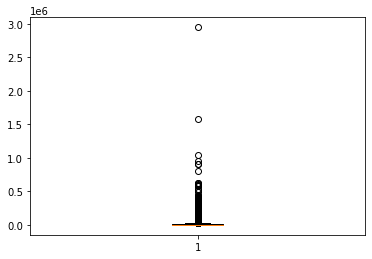

percentage20_donald_trump


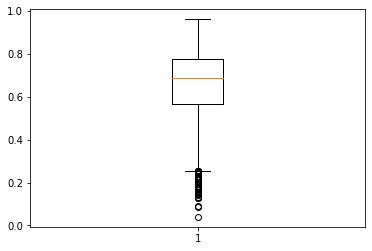

percentage20_joe_biden


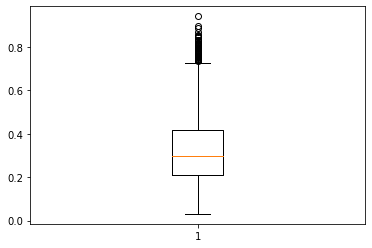

cases


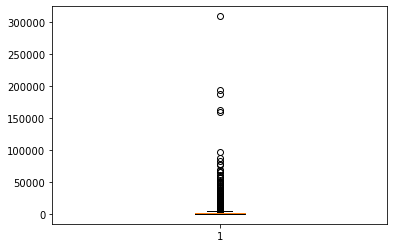

deaths


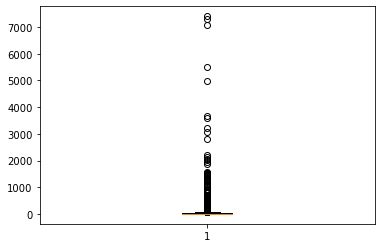

men


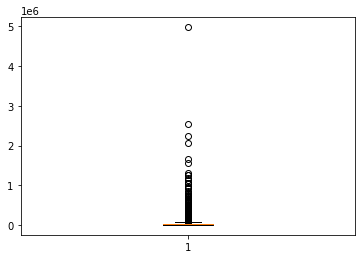

women


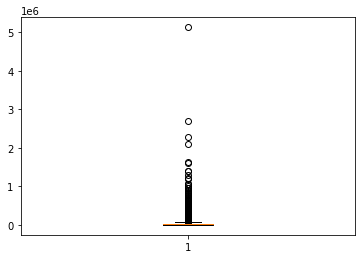

hispanic


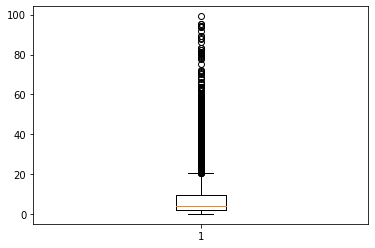

white


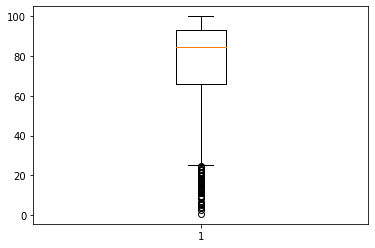

black


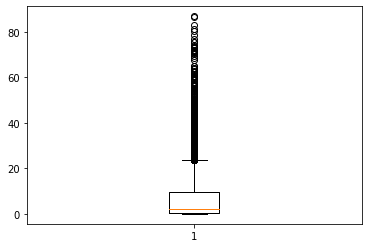

native


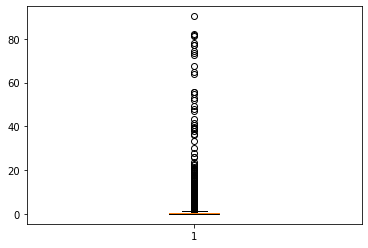

asian


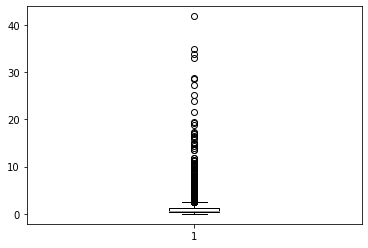

pacific


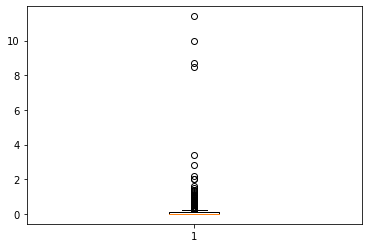

income


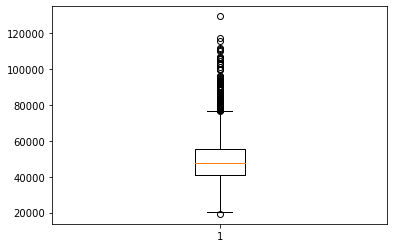

incomepercap


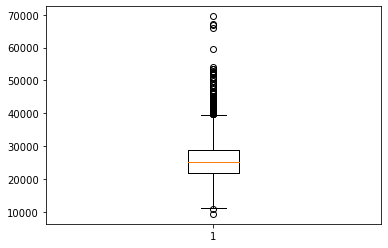

poverty


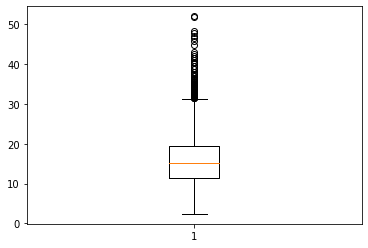

professional


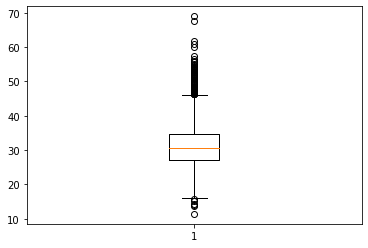

service


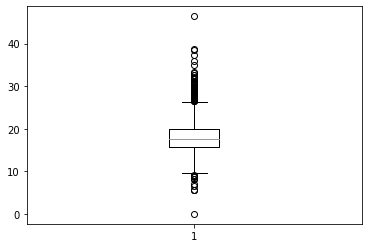

office


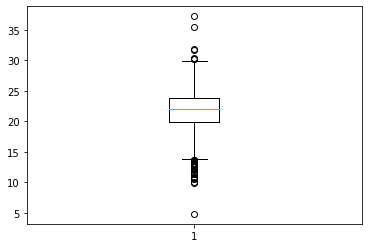

construction


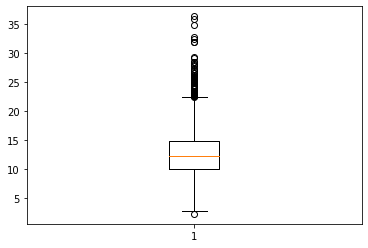

production


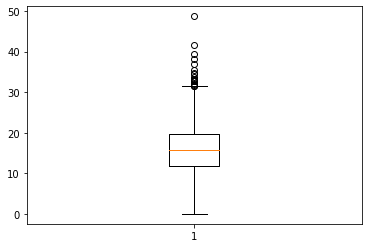

drive


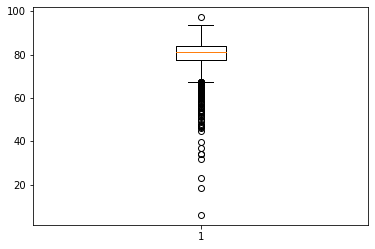

carpool


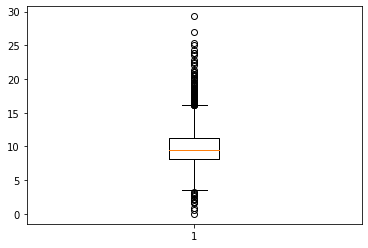

transit


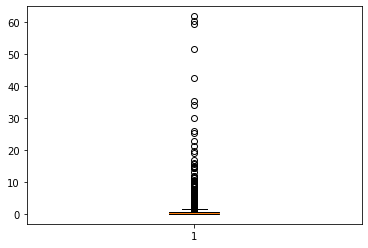

walk


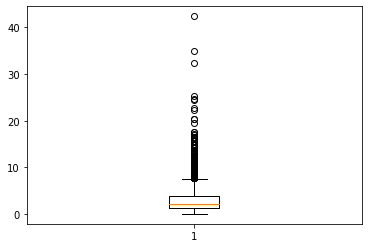

othertransp


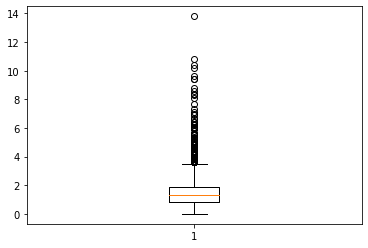

workathome


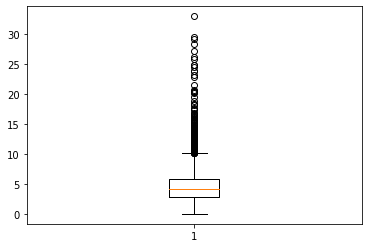

meancommute


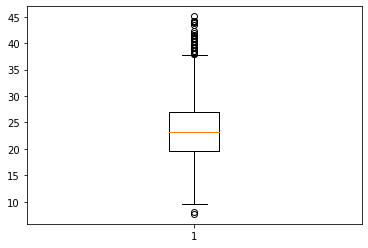

employed


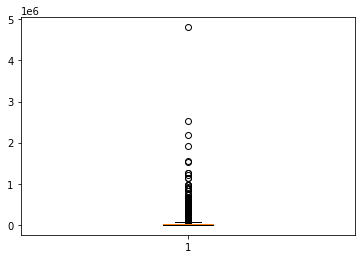

privatework


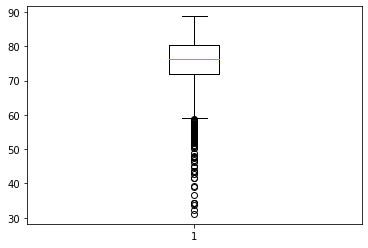

publicwork


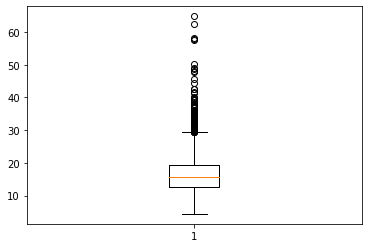

selfemployed


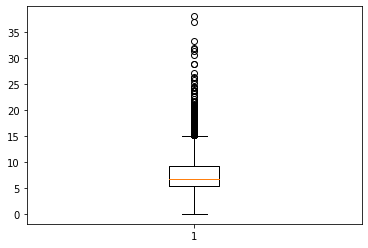

familywork


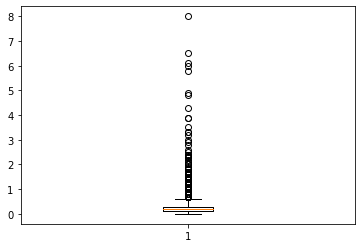

unemployment


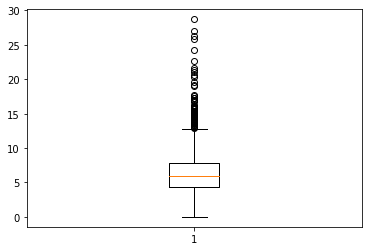

cases_per_capita_100k


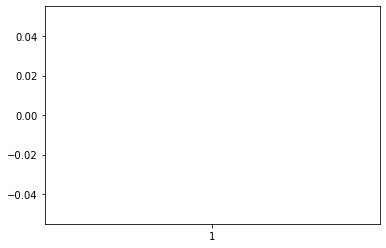

deaths_per_capita_100k


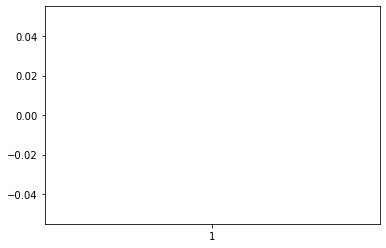

pop_per_sq_mile_2010


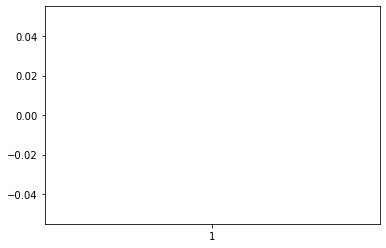

age_oto4


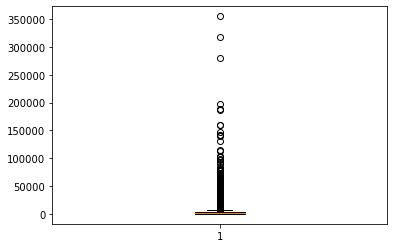

age_5to14


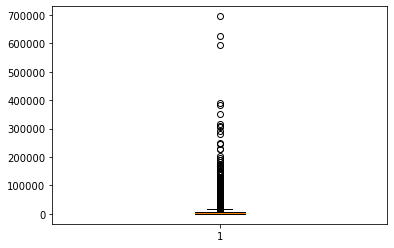

age_15to24


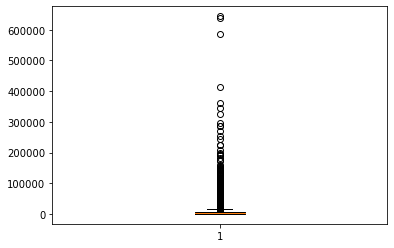

age_25to34


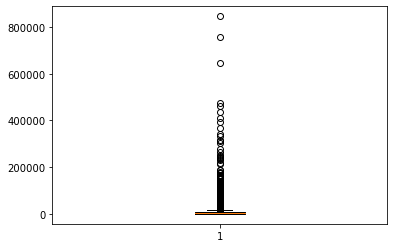

age_35to44


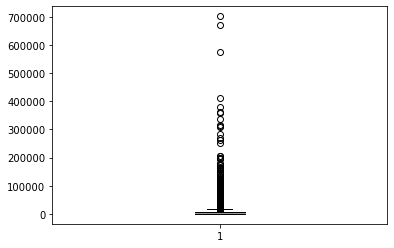

age_45to54


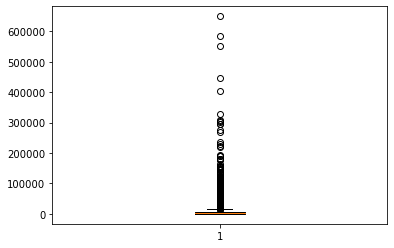

age_55to64


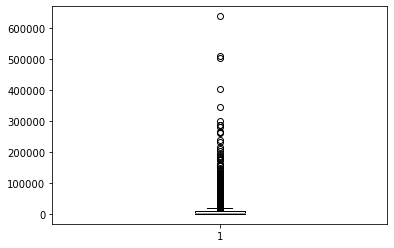

age_65to74


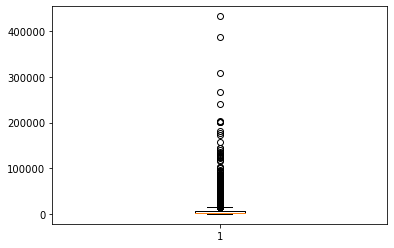

age_75to84


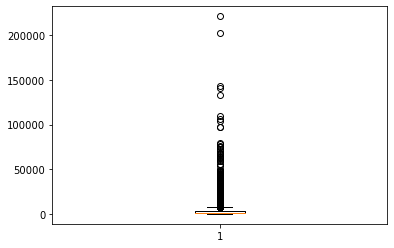

age_84plus


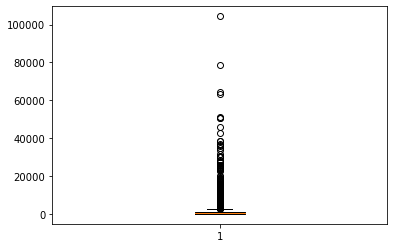

evangelicals


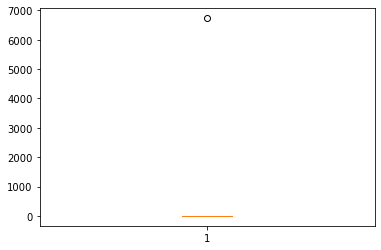

protestant


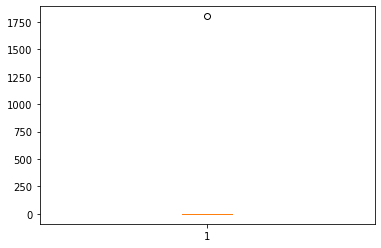

catholic


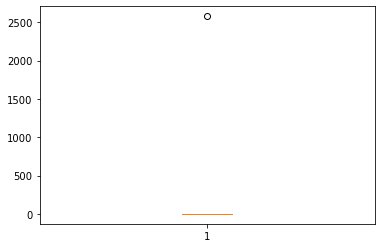

orthodox


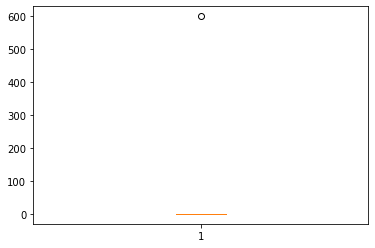

muslim


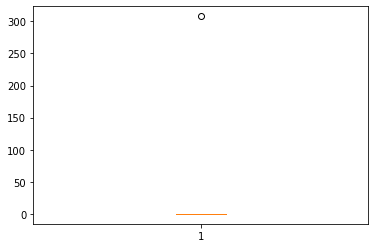

other


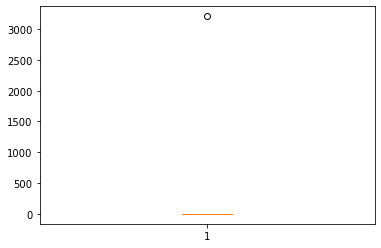

normalized_cases


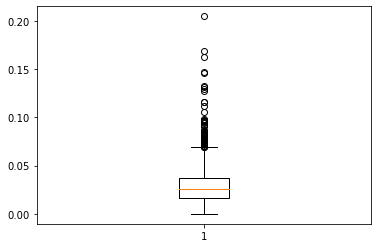

In [6]:
# plot all histograms except county, state, county_state, lat, and long (not used for analysis)
for i in col[1:]:
    print(i)
    plt.figure()
    plt.boxplot(county_df[i])
    #plt.xlabel(col[1:])
    plt.show()

<AxesSubplot:>

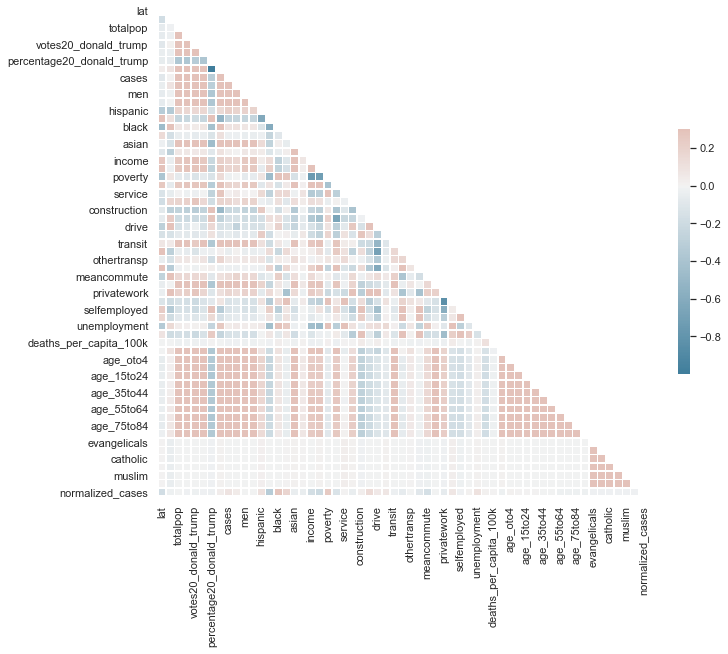

In [7]:
sns.set_theme(style="white")

# Compute the correlation matrix
corr = county_df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [9]:
county_df.drop(columns=['lat','long'],axis=1).corr()

,totalpop,total_votes20,votes20_donald_trump,votes20_joe_biden,percentage20_donald_trump,percentage20_joe_biden,cases,deaths,men,women,...,age_65to74,age_75to84,age_84plus,evangelicals,protestant,catholic,orthodox,muslim,other,normalized_cases
totalpop,1.000000,0.974928,0.908159,0.969847,-0.366317,0.368234,0.950446,0.810714,0.999881,0.999889,...,0.754397,0.742648,0.736570,-0.002631,-0.002631,-0.002631,-0.002631,-0.002631,-0.002631,-0.004511
total_votes20,0.974928,1.000000,0.949801,0.984181,-0.366340,0.368070,0.915932,0.729627,0.975333,0.974317,...,0.758358,0.745710,0.734712,-0.002259,-0.002259,-0.002259,-0.002259,-0.002259,-0.002259,-0.013661
votes20_donald_trump,0.908159,0.949801,1.000000,0.879413,-0.322464,0.323757,0.867620,0.658540,0.909307,0.906847,...,0.800592,0.794796,0.766255,-0.002365,-0.002365,-0.002365,-0.002365,-0.002365,-0.002365,-0.014614
votes20_joe_biden,0.969847,0.984181,0.879413,1.000000,-0.374922,0.376968,0.903994,0.740317,0.969745,0.969728,...,0.703112,0.687370,0.686914,-0.002168,-0.002168,-0.002168,-0.002168,-0.002168,-0.002168,-0.012030
percentage20_donald_trump,-0.366317,-0.366340,-0.322464,-0.374922,1.000000,-0.998743,-0.313468,-0.302485,-0.364734,-0.367761,...,-0.367175,-0.350463,-0.359337,-0.013355,-0.013355,-0.013355,-0.013355,-0.013355,-0.013355,-0.027139
percentage20_joe_biden,0.368234,0.368070,0.323757,0.376968,-0.998743,1.000000,0.316188,0.307715,0.366547,0.369778,...,0.370036,0.353780,0.362616,0.011970,0.011970,0.011970,0.011970,0.011970,0.011970,0.031910
cases,0.950446,0.915932,0.867620,0.903994,-0.313468,0.316188,1.000000,0.821005,0.949576,0.951072,...,0.740958,0.736918,0.723481,-0.003529,-0.003529,-0.003529,-0.003529,-0.003529,-0.003529,0.084255
deaths,0.810714,0.729627,0.658540,0.740317,-0.302485,0.307715,0.821005,1.000000,0.805295,0.815758,...,0.691691,0.699393,0.715863,-0.003375,-0.003375,-0.003375,-0.003375,-0.003375,-0.003375,0.043912
men,0.999881,0.975333,0.909307,0.969745,-0.364734,0.366547,0.949576,0.805295,1.000000,0.999541,...,0.751585,0.739531,0.732704,-0.002516,-0.002516,-0.002516,-0.002516,-0.002516,-0.002516,-0.004555
women,0.999889,0.974317,0.906847,0.969728,-0.367761,0.369778,0.951072,0.815758,0.999541,1.000000,...,0.756939,0.745488,0.740132,-0.002742,-0.002742,-0.002742,-0.002742,-0.002742,-0.002742,-0.004467
